# Lab 03

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

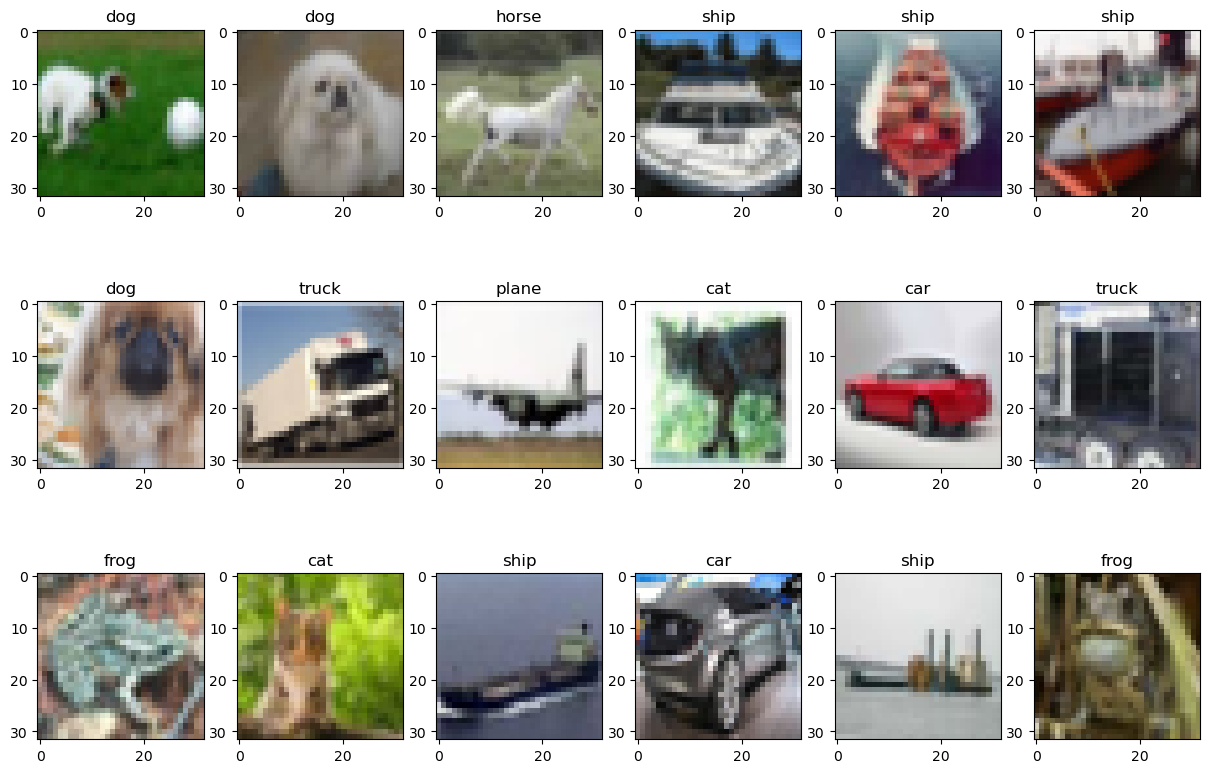

In [3]:
# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, x_train.shape[0])
    # Show the image and the label
    plt.imshow(x_train[idx]) #, classes[int(y_train[idx])])
    plt.title(classes[int(y_train[idx])])

In [4]:
x_train.shape

(50000, 32, 32, 3)

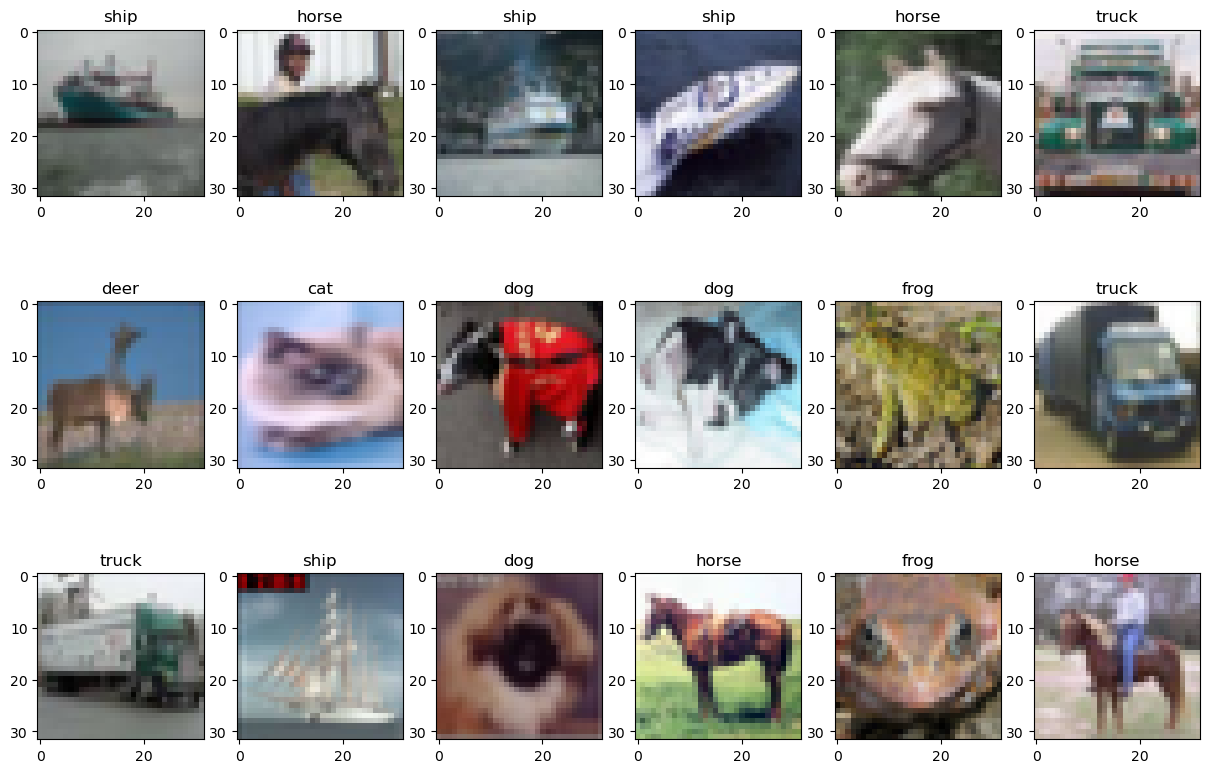

In [5]:
# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, x_train.shape[0])
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

In [6]:
y_train.flatten()

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
# Compute the class histogram
from collections import Counter
hist = Counter(y_train.flatten())

Text(0, 0.5, 'Counts')

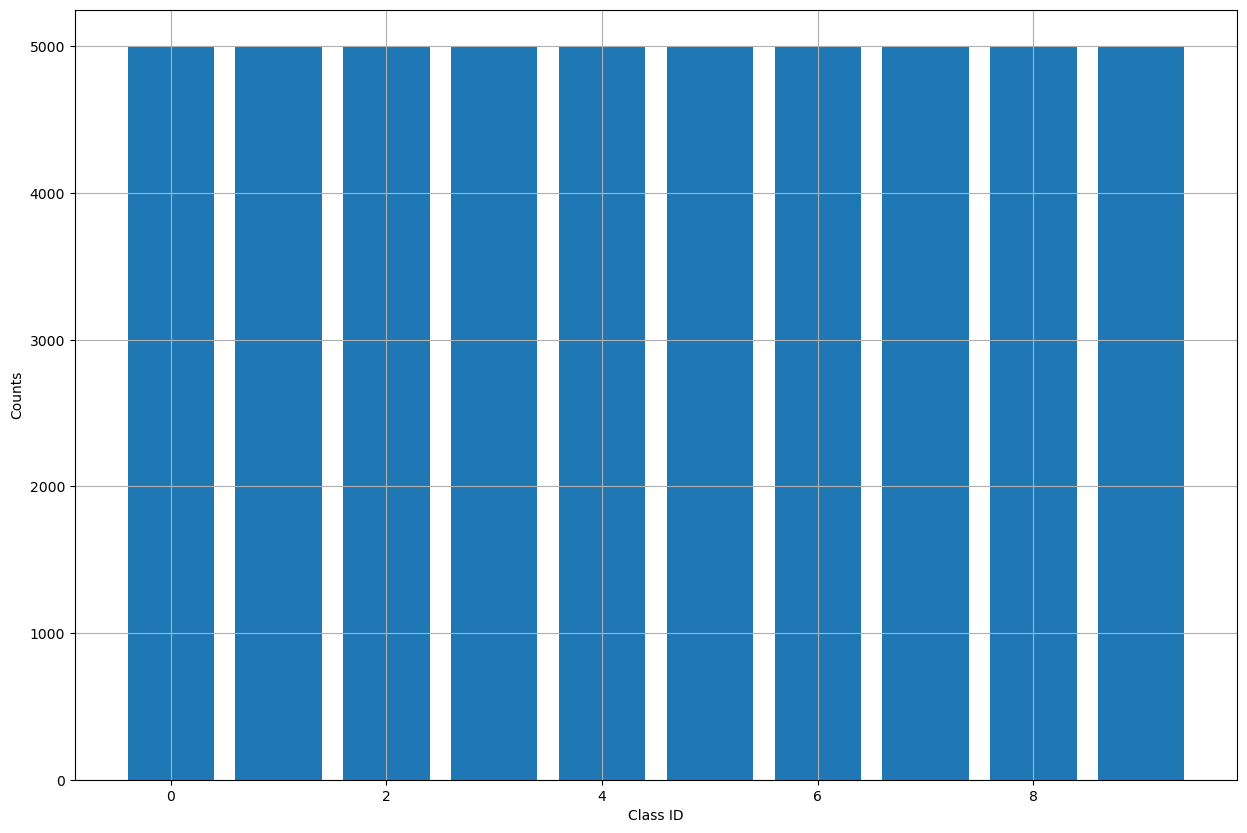

In [8]:
plt.bar(hist.keys(), hist.values())
plt.grid()
plt.xlabel('Class ID')
plt.ylabel('Counts')

### Conclusion: dataset is balanced.

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [9]:
import pandas as pd
# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = np.array(pd.get_dummies(pd.Series(y_train.flatten())))
y_test = np.array(pd.get_dummies(pd.Series(y_test.flatten())))

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


In [10]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [11]:
from tensorflow.keras import layers

In [12]:
size = x_train.shape[1]

In [13]:
inputs = Input(shape=(size, size, 3))
outputs = Conv2D(filters=32, kernel_size=(3, 3), activation='relu',  strides=1, padding='same')(inputs)
outputs = MaxPooling2D(pool_size=(2, 2))(outputs)
outputs = Dropout(0.3)(outputs)

outputs = Conv2D(filters=64, kernel_size=(3, 3), activation='relu',strides=1, padding='same')(outputs)
outputs = MaxPooling2D(pool_size=(2, 2))(outputs)
outputs = Dropout(0.3)(outputs)

outputs = Conv2D(filters=128, kernel_size=(3, 3), activation='relu',strides=1, padding='same')(outputs)
outputs = MaxPooling2D(pool_size=(2, 2))(outputs)
outputs = Dropout(0.3)(outputs)

outputs = Conv2D(filters=128, kernel_size=(3, 3), activation='relu',strides=1, padding='same')(outputs)
outputs = MaxPooling2D(pool_size=(2, 2))(outputs)
outputs = Dropout(0.3)(outputs)

outputs = Flatten()(outputs)
result = Dense(10, activation='softmax')(outputs)

model = Model(inputs, result)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                        

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                        

### Step 3: Training

Compile the model and train it.

In [15]:
early_stopping = keras.callbacks.EarlyStopping(patience=5)
history  = model.fit(x_train, y_train,batch_size=128,
                      epochs=25, validation_split=0.1, verbose=1)

Epoch 1/25
352/352 [==============================] - 42s 115ms/step - loss: 1.7592 - accuracy: 0.3422 - val_loss: 1.4307 - val_accuracy: 0.4842
Epoch 2/25
352/352 [==============================] - 42s 120ms/step - loss: 1.3960 - accuracy: 0.4955 - val_loss: 1.2159 - val_accuracy: 0.5700
Epoch 3/25
352/352 [==============================] - 42s 119ms/step - loss: 1.2536 - accuracy: 0.5482 - val_loss: 1.0771 - val_accuracy: 0.6338
Epoch 4/25
352/352 [==============================] - 42s 120ms/step - loss: 1.1457 - accuracy: 0.5917 - val_loss: 0.9868 - val_accuracy: 0.6638
Epoch 5/25
352/352 [==============================] - 42s 120ms/step - loss: 1.0630 - accuracy: 0.6204 - val_loss: 0.9148 - val_accuracy: 0.6936
Epoch 6/25
352/352 [==============================] - 42s 121ms/step - loss: 0.9971 - accuracy: 0.6473 - val_loss: 0.8616 - val_accuracy: 0.7104
Epoch 7/25
352/352 [==============================] - 43s 122ms/step - loss: 0.9483 - accuracy: 0.6636 - val_loss: 0.8298 - val_ac

Train Acc      0.7705333232879639
Validation Acc 0.7983999848365784


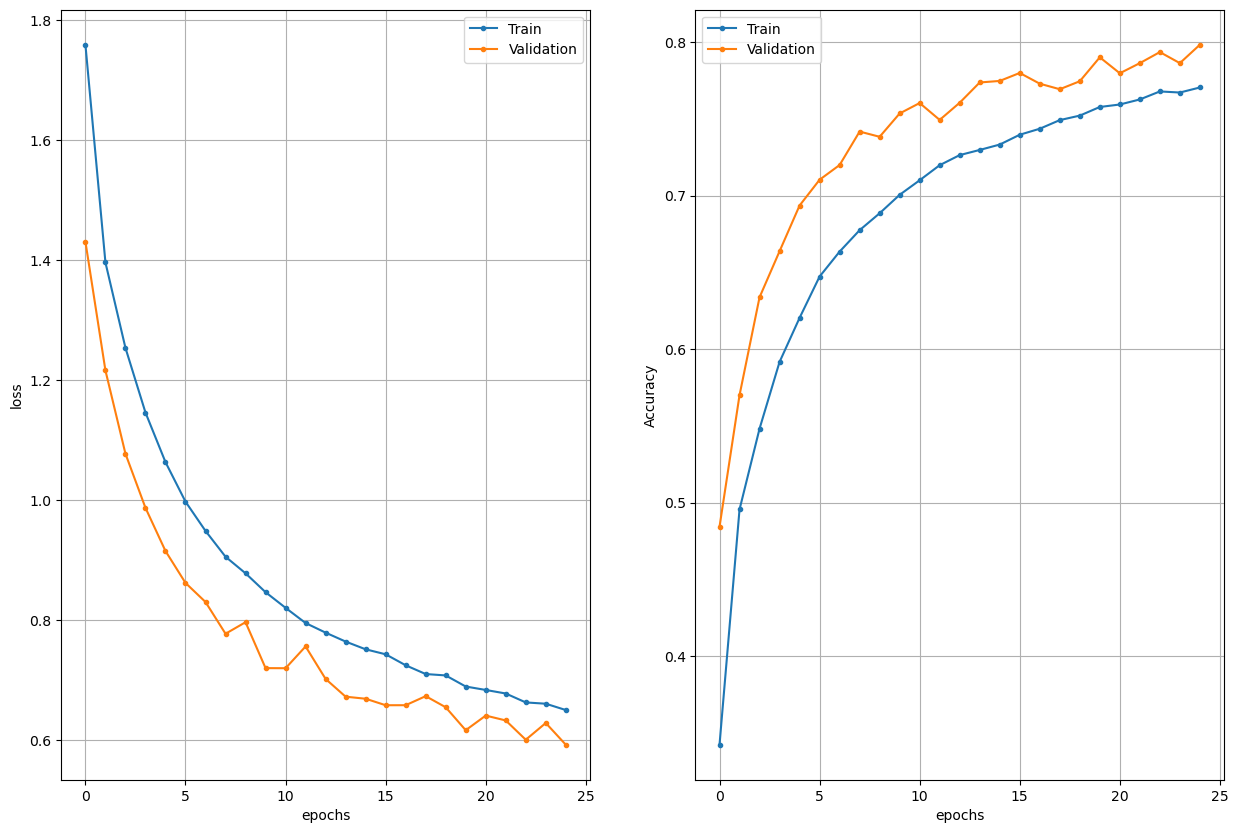

In [16]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [17]:
np.argmax(y_test, axis=1)

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [18]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

313/313 [==============================] - 3s 10ms/step


In [19]:
y_pred = np.argmax(y_pred, axis=1)

In [20]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    mask = y_true == class_id
    tp = np.sum(y_pred[mask] == class_id)
    total = np.sum(mask)
    acc =tp/total
    print(class_name, acc)

plane 0.801
car 0.927
bird 0.721
cat 0.544
deer 0.729
dog 0.653
frog 0.917
horse 0.83
ship 0.9
truck 0.848


In [21]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 4s 13ms/step - loss: 0.6207 - accuracy: 0.7870
Test loss   0.6206595301628113
Test metric 0.7870000004768372


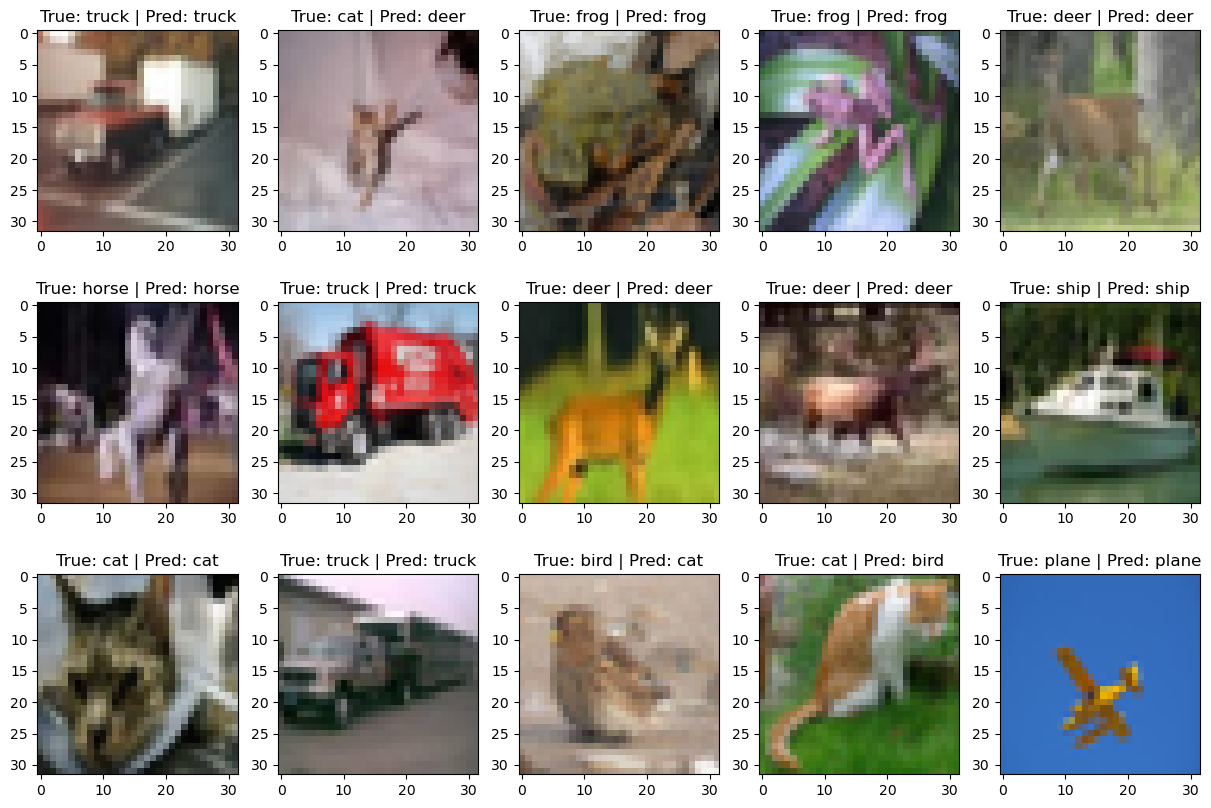

In [22]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, x_test.shape[0])
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

### Questions
* What is the overall accuracy of the classifier?
* What modifications would you do in order to improve the classification accuracy?
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?